# Carregamento de Dados

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('./dataset/sales_data.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_de_experiencia  100 non-null    int64  
 1   numero_de_vendas      100 non-null    int64  
 2   fator_sazonal         100 non-null    int64  
 3   receita_em_reais      100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [140]:
# Copiar df para df_eda
df_eda = df.copy()

In [141]:
# Copiar df para df_bucketing
df_bucketing = df.copy()

### EDA

In [142]:
# Visualizar dados
df_eda.head()

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
0,36,21,5,2639.886941
1,74,44,10,4707.322227
2,38,44,4,5910.035131
3,52,62,6,6130.742546
4,97,56,2,7516.457681


In [143]:
# Detectar valores ausentes
df_eda.isna().sum()

tempo_de_experiencia    0
numero_de_vendas        0
fator_sazonal           0
receita_em_reais        0
dtype: int64

In [144]:
# Estatísticas do df
df_eda.describe()

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
count,100.000000,100.000000,100.000000,100.000000
mean,64.490000,54.490000,5.820000,5112.941924
std,32.397935,25.307201,2.836914,2544.731052
min,1.000000,10.000000,1.000000,1133.363948
25%,38.750000,37.500000,4.000000,2800.660516
50%,64.500000,52.500000,5.000000,4953.770034
75%,93.000000,70.500000,8.000000,7079.500163
max,119.000000,100.000000,10.000000,9941.016458


<Axes: xlabel='fator_sazonal'>

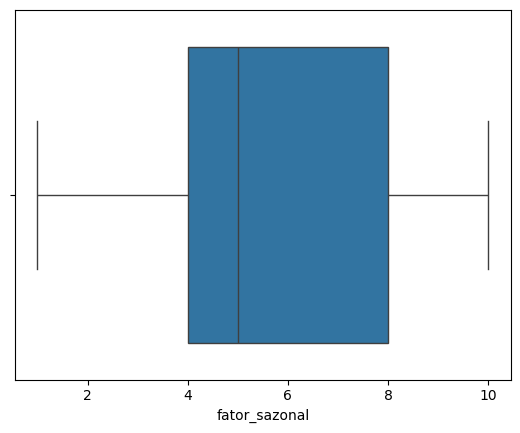

In [145]:
# Detectar outliers
sns.boxplot(data=df_eda, x='fator_sazonal')

<Axes: xlabel='fator_sazonal', ylabel='receita_em_reais'>

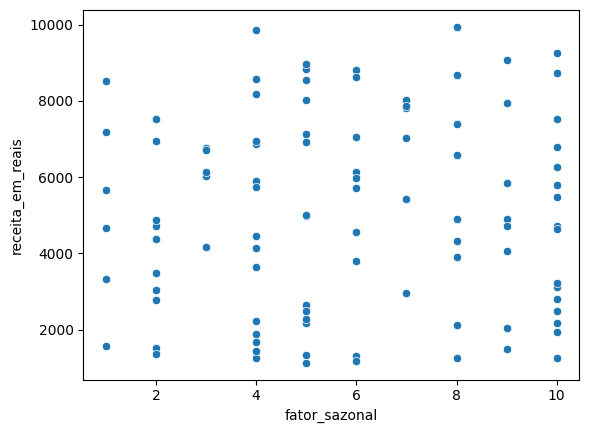

In [219]:
# Cruzamento de variáveis numéricas com salario_em_reais (variável dependente)
sns.scatterplot(data=df_eda, x='fator_sazonal', y='receita_em_reais')

<Axes: xlabel='fator_sazonal', ylabel='receita_em_reais'>

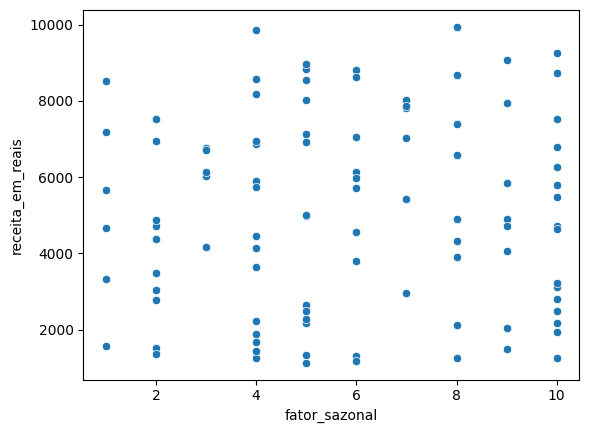

In [147]:
sns.scatterplot(data=df_eda, x='fator_sazonal', y='receita_em_reais')

<Axes: xlabel='numero_de_vendas', ylabel='receita_em_reais'>

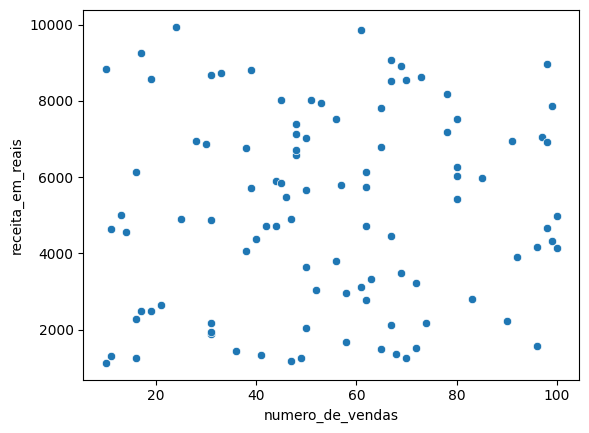

In [148]:
sns.scatterplot(data=df_eda, x='numero_de_vendas', y='receita_em_reais')

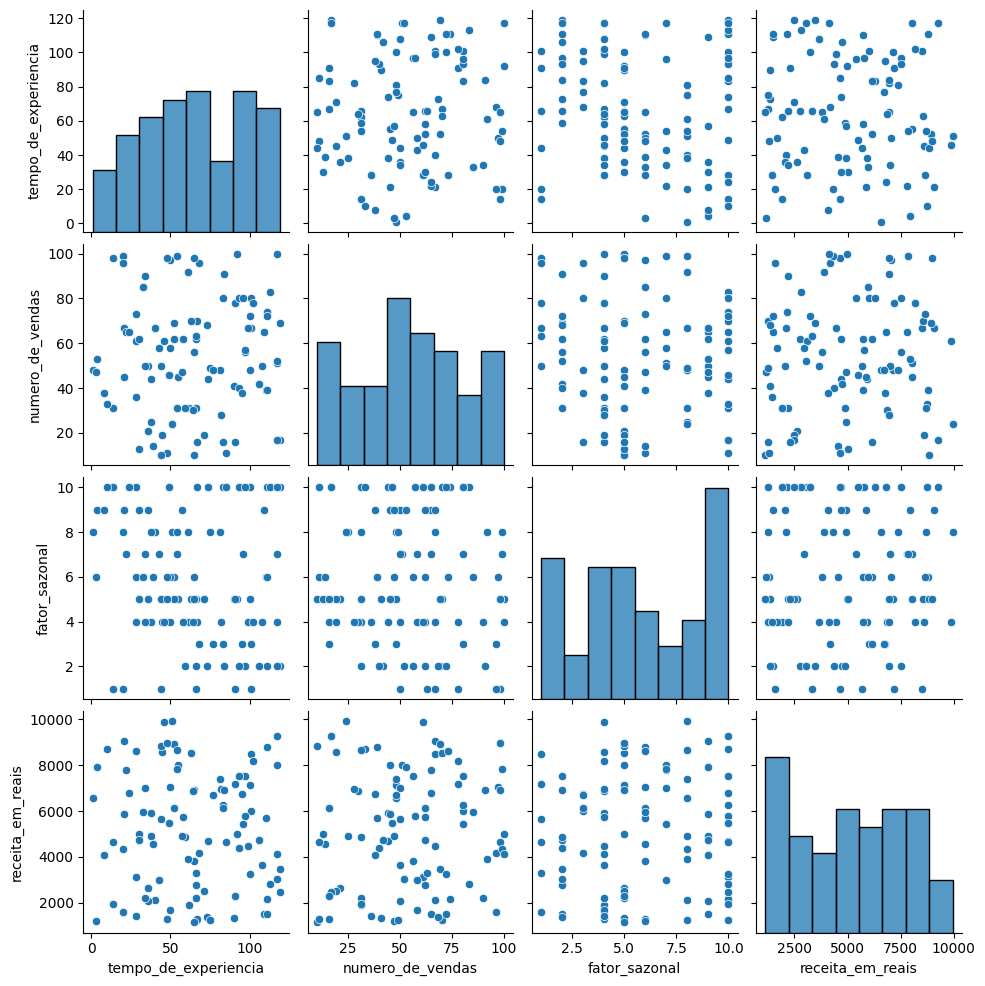

In [149]:
# Histograma das variaveis
sns.pairplot(df_eda)

<Axes: >

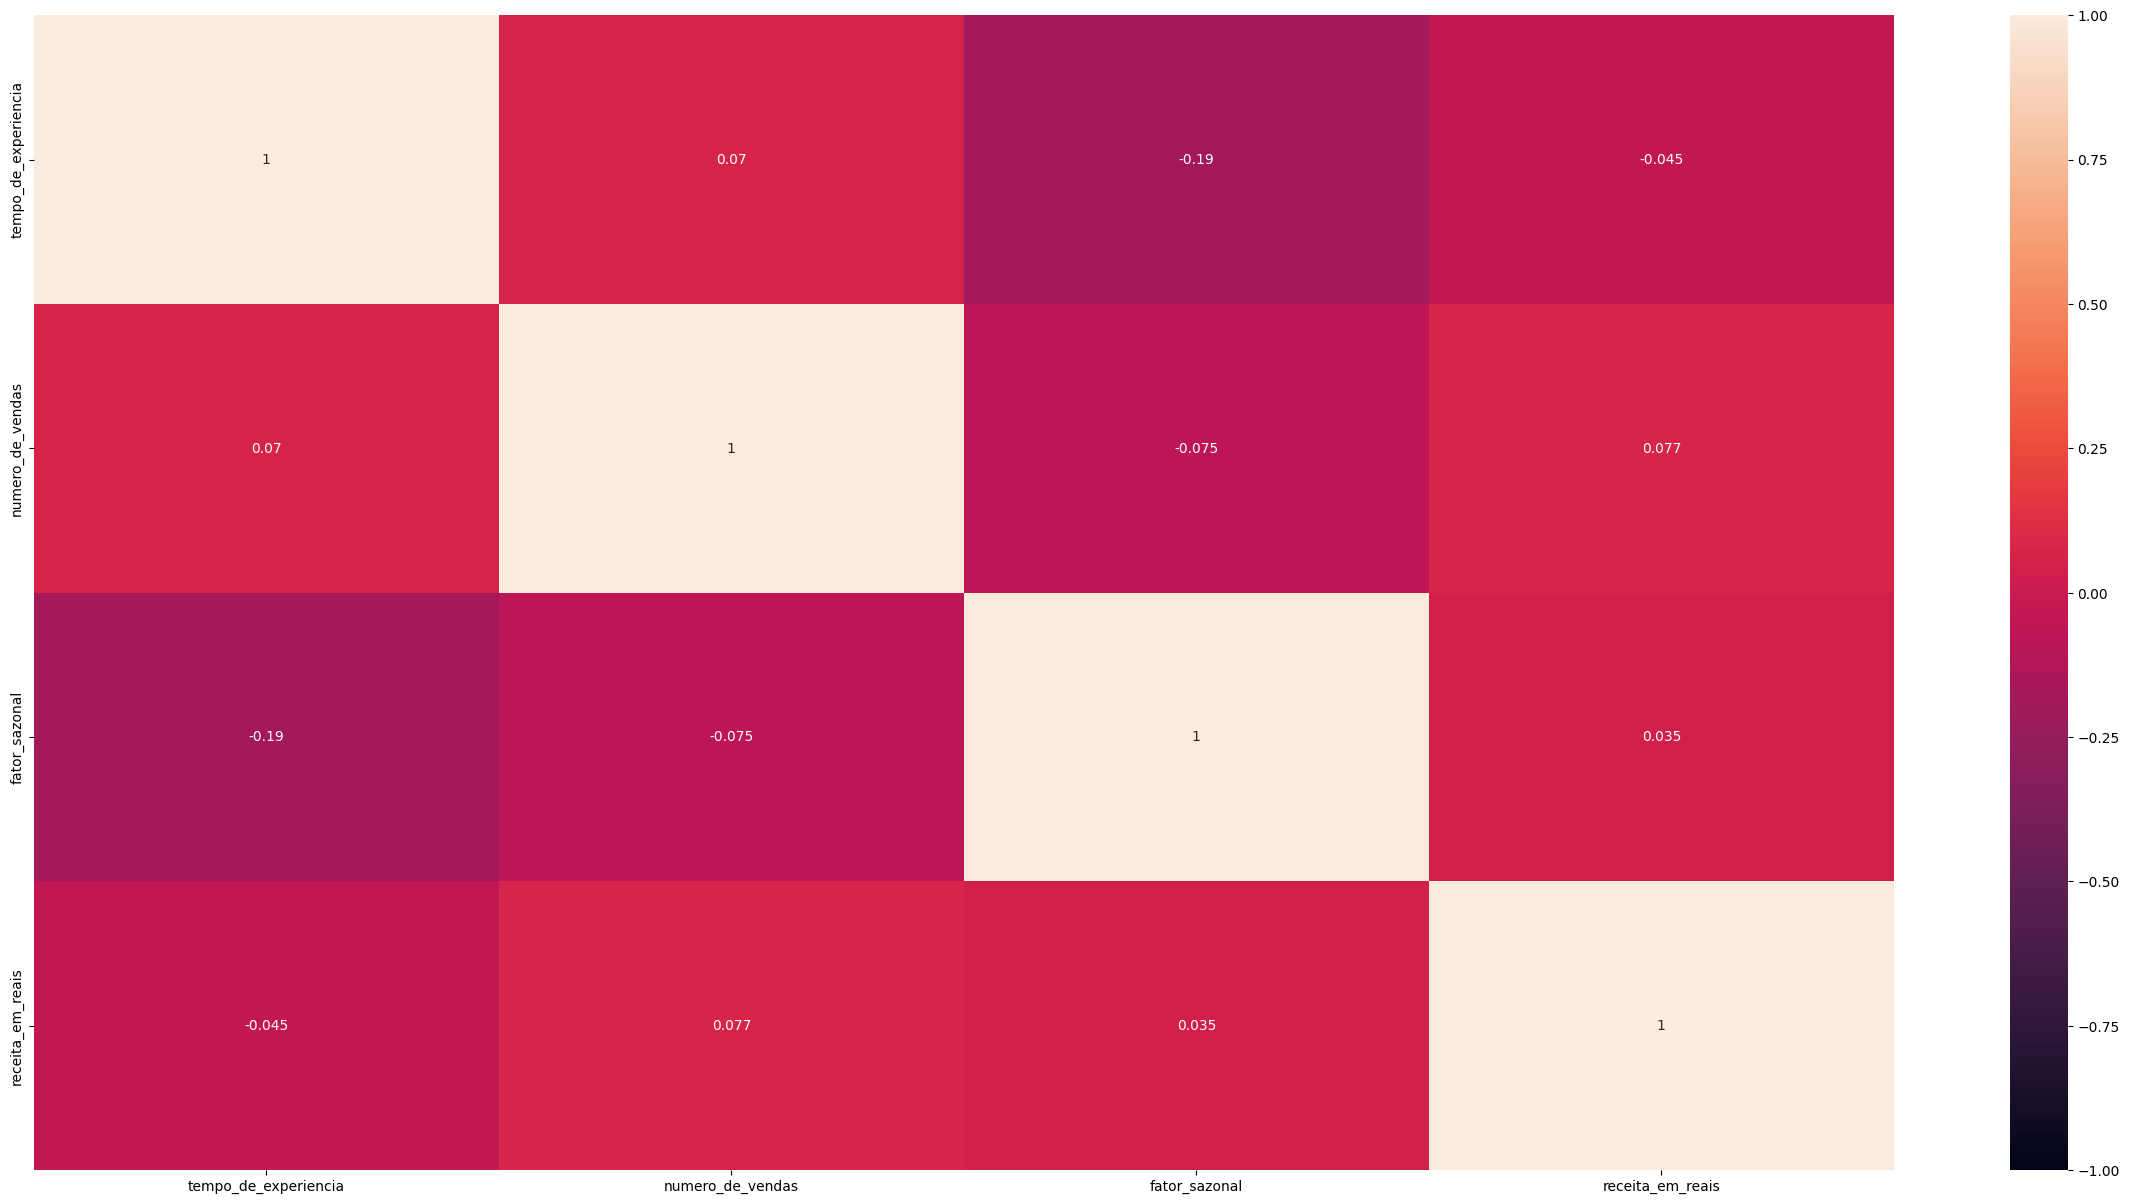

In [150]:
# Mapa de calor
plt.figure(figsize= (30,15))
sns.heatmap(df_eda.corr('spearman'), vmin=-1, vmax=1, annot=True)

<Axes: >

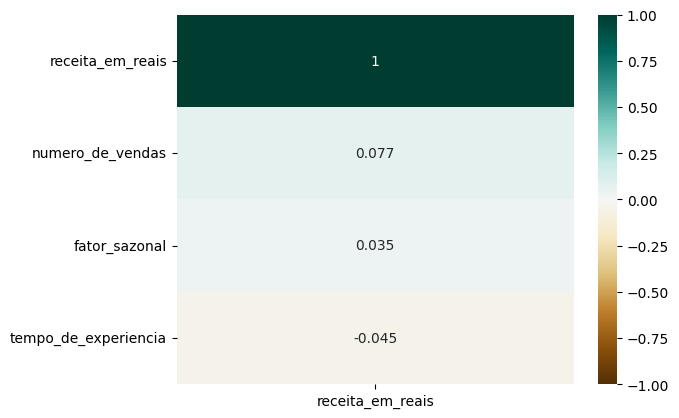

In [151]:
# Formato de ranking
sns.heatmap(df_eda.corr('spearman')[['receita_em_reais']].sort_values(by='receita_em_reais', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [152]:
# Bucketing tempo_na_empresa
bins_numero_de_vendas = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels_numero_de_vendas = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df_bucketing['escala_numero_de_vendas'] = pd.cut(x=df_bucketing
['numero_de_vendas'], bins=bins_numero_de_vendas, labels=labels_numero_de_vendas, include_lowest=True)

In [153]:
df_bucketing.head(20)

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais,escala_numero_de_vendas
0,36,21,5,2639.886941,20-29
1,74,44,10,4707.322227,40-49
2,38,44,4,5910.035131,40-49
3,52,62,6,6130.742546,60-69
4,97,56,2,7516.457681,50-59
5,67,70,10,1247.882324,60-69
6,119,69,2,3485.606208,60-69
7,66,62,2,2773.987427,60-69
8,68,96,3,4177.919578,90-99
9,106,42,2,4719.691069,40-49


<Axes: xlabel='numero_de_vendas', ylabel='receita_em_reais'>

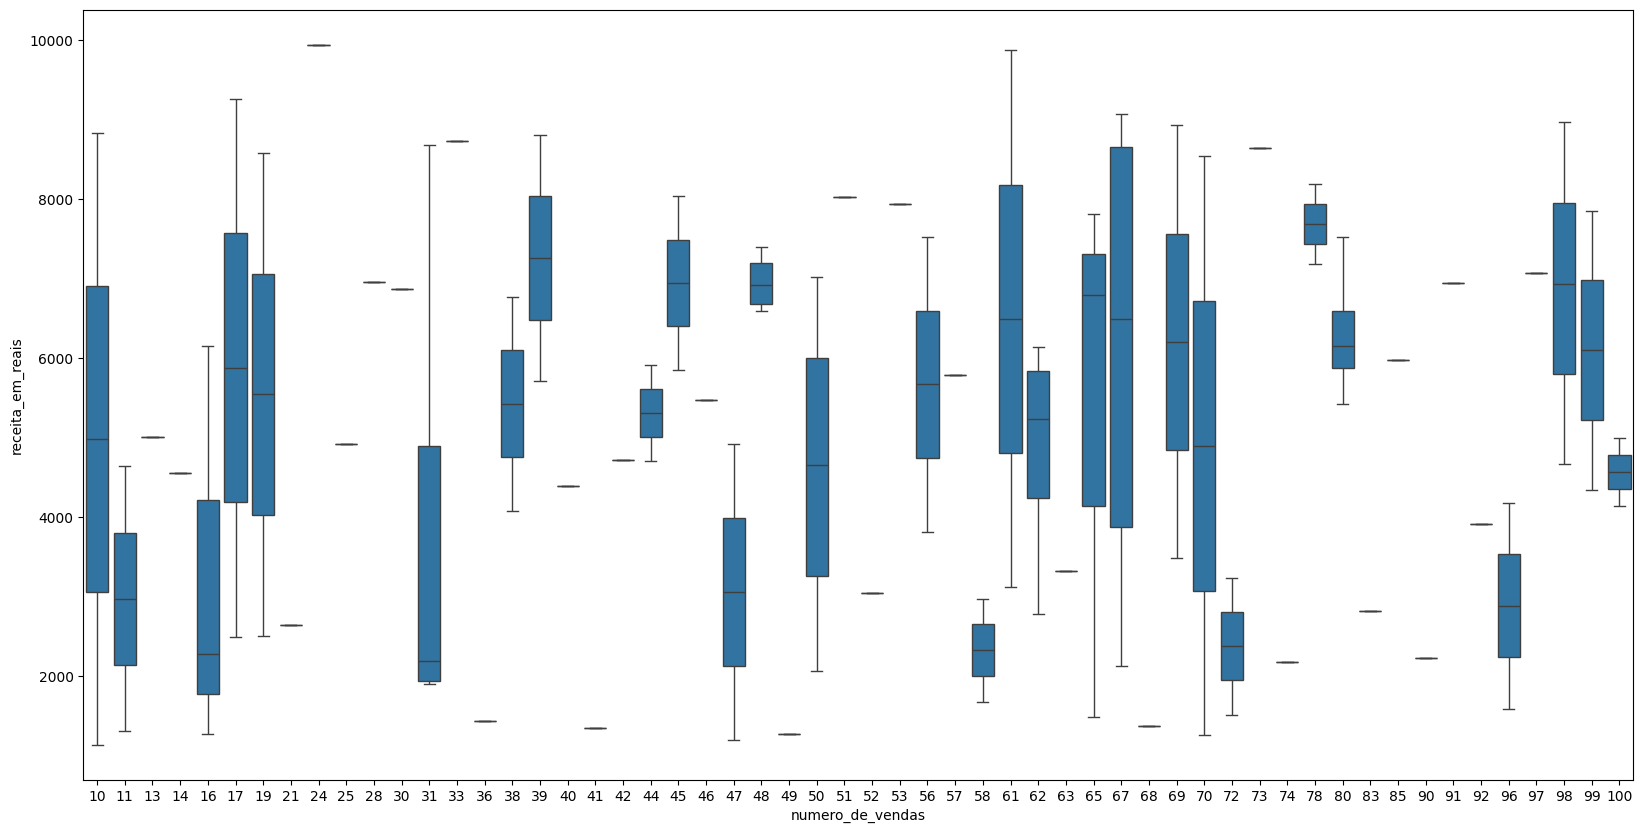

In [154]:
plt.figure(figsize=(20,10))
sns.boxplot(df_bucketing, x='numero_de_vendas', y='receita_em_reais')

### Treinar modelo linear

In [155]:
# Importar bibliotecas
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [156]:
# Criar dataset de treino e teste
X = df.drop(columns='receita_em_reais', axis=1)
y= df['receita_em_reais']

In [157]:
# Split usando Kfold com 5 pastas
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [158]:
kf.split(X)

<generator object _BaseKFold.split at 0x00000247FB1298B0>

In [239]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir os graus do polinômio a serem testados
graus_polynomial = [1, 2, 3, 4, 5]  # Testar diferentes graus de polinômio

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

# KFold com 5 divisões
kf = KFold(n_splits=5, shuffle=True, random_state=51)

# Label Encoding para a variável 'fator_sazonal' (variável ordinal)
encoder = LabelEncoder()
X['fator_sazonal'] = encoder.fit_transform(X['fator_sazonal'])

# Loop para testar diferentes graus polinomiais
for grau in graus_polynomial:
    # Nomes das colunas
    colunas_numericas = ['tempo_de_experiencia', 'numero_de_vendas']
    colunas_categoricas = ['fator_sazonal']

    # Transformer para colunas numéricas
    transformer_numericas = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Transformer para colunas categóricas (Label Encoding já foi feito)
    transformer_categoricas = Pipeline(steps=[
        # Não há necessidade de transformação adicional para 'fator_sazonal', pois já foi feito o Label Encoding
    ])

    # ColumnTransformer com ambos os tipos de colunas
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_numericas, colunas_numericas),
            ('cat', transformer_categoricas, colunas_categoricas)
        ]
    )

    # Features polinomiais
    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    # Pipeline final
    model_poly = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly_features', poly_feat),
        ('regressor', LinearRegression())
    ])

    # Armazenar resultados
    rmse_score_fold_train = []
    rmse_score_fold_test = []
    r2score_fold_test = []
    residuos = []
    y_pred_total = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Ajuste para y_train (transformando para 1D)
        model_poly.fit(X_train, y_train.values.ravel())

        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)

        rmse_score_fold_train.append(rmse_train)
        rmse_score_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)

    # Resultados finais
    rmse_train_final = np.mean(rmse_score_fold_train)
    rmse_test_final = np.mean(rmse_score_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = (rmse_test_final - rmse_train_final) / rmse_train_final

    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)

    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)

# Imprimir os resultados finais
print("RMSE Train:", rmse_train_values)
print("RMSE Test:", rmse_test_values)
print("Percentual RMSE:", percentual_rmse_values)
print("R2 Score Test:", r2score_test_values)




TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. 'Pipeline(steps=[])' (type <class 'sklearn.pipeline.Pipeline'>) doesn't.

In [160]:
# Métricas
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final}')
print(f'R2Score Teste: {r2score_test_final}')

RMSE Treino: 2426.566078701206
RMSE Teste: 2765.934475186063
% Dif. RMSE Treino e Teste: 0.13985541109455393
R2Score Teste: -0.23924214675728597


In [161]:
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

### Análise de resíduos - modelo linear

In [162]:
# Transformar residuos na escala padrao
# (X-media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

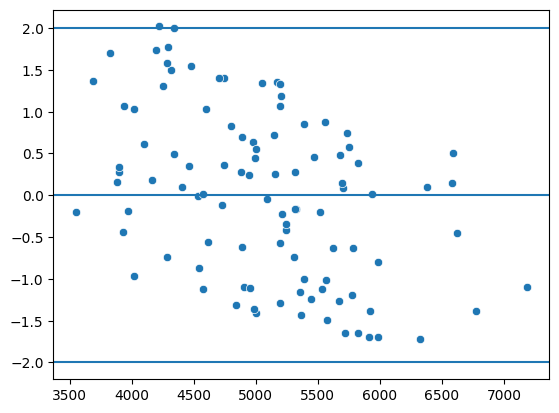

In [ ]:
# linearidade dos residuos: valores -2 ~ +2 (escala padrão)
# homocedasticidade: valores em torno da reta sem nenhuma tendência ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

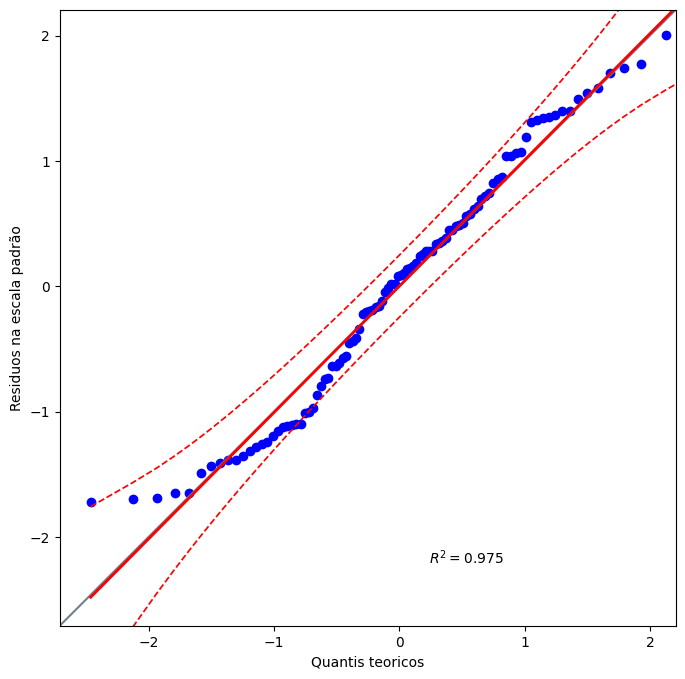

In [164]:
# Checar se residuos seguem uma distribuição normal
# QQ plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis teoricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

In [165]:
# Teste de normalidade - Shapiro Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estatistica de teste {stat_shapiro} e P-Value {p_value_shapiro}")

Estatistica de teste 0.9677140152188298 e P-Value 0.014814740832918448


In [166]:
# Teste de normalidade - Kolmogorov Smirnov
stats_ks, p_value_ks = kstest(residuos,'norm')
print(f"Estatistica de teste {stats_ks} e P-Value {p_value_ks}")

Estatistica de teste 0.54 e P-Value 8.032546727914934e-28


In [167]:
# Teste de normalidade - Lilliefors
stats_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f"Estatistica de teste {stats_ll} e P-Value {p_value_ll}")

Estatistica de teste 0.08307259532263153 e P-Value 0.08922006093638135


### Treinar modelo polinomial

In [168]:
# Exemplo de criação de features polinomiais
feat_poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = feat_poly.fit_transform(X)
feat_poly.feature_names_in_

array(['tempo_de_experiencia', 'numero_de_vendas', 'fator_sazonal'],
      dtype=object)

In [169]:
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_de_experiencia', 'numero_de_vendas', 'fator_sazonal',
       'tempo_de_experiencia^2', 'tempo_de_experiencia numero_de_vendas',
       'tempo_de_experiencia fator_sazonal', 'numero_de_vendas^2',
       'numero_de_vendas fator_sazonal', 'fator_sazonal^2',
       'tempo_de_experiencia^3',
       'tempo_de_experiencia^2 numero_de_vendas',
       'tempo_de_experiencia^2 fator_sazonal',
       'tempo_de_experiencia numero_de_vendas^2',
       'tempo_de_experiencia numero_de_vendas fator_sazonal',
       'tempo_de_experiencia fator_sazonal^2', 'numero_de_vendas^3',
       'numero_de_vendas^2 fator_sazonal',
       'numero_de_vendas fator_sazonal^2', 'fator_sazonal^3'],
      dtype=object)

In [261]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir os graus do polinômio a serem testados
graus_polynomial = [1]  # Testar diferentes graus de polinômio

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

# KFold com 5 divisões
kf = KFold(n_splits=5, shuffle=True, random_state=51)

# Label Encoding para a variável 'fator_sazonal' (variável ordinal)
encoder = LabelEncoder()
X['fator_sazonal'] = encoder.fit_transform(X['fator_sazonal'])

# Loop para testar diferentes graus polinomiais
for grau in graus_polynomial:
    # Nomes das colunas
    colunas_numericas = ['tempo_de_experiencia', 'numero_de_vendas']
    colunas_categoricas = ['fator_sazonal']

    # Transformer para colunas numéricas
    transformer_numericas = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Não precisamos de transformações para 'fator_sazonal', mas a pipeline precisa existir
    transformer_categoricas = Pipeline(steps=[
        ('passthrough', 'passthrough')  # Apenas passa os dados como estão
    ])

    # ColumnTransformer com ambos os tipos de colunas
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_numericas, colunas_numericas),
            ('cat', transformer_categoricas, colunas_categoricas)
        ]
    )

    # Features polinomiais
    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    # Pipeline final
    model_poly = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly_features', poly_feat),
        ('regressor', LinearRegression())
    ])

    # Armazenar resultados
    rmse_score_fold_train = []
    rmse_score_fold_test = []
    r2score_fold_test = []
    residuos = []
    y_pred_total = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Ajuste para y_train (transformando para 1D)
        model_poly.fit(X_train, y_train.values.ravel())

        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)

        rmse_score_fold_train.append(rmse_train)
        rmse_score_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)

    # Resultados finais
    rmse_train_final = np.mean(rmse_score_fold_train)
    rmse_test_final = np.mean(rmse_score_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = (rmse_test_final - rmse_train_final) / rmse_train_final

    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)

    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)

# Imprimir os resultados finais
print("RMSE Train:", rmse_train_values)
print("RMSE Test:", rmse_test_values)
print("Percentual RMSE:", percentual_rmse_values)
print("R2 Score Test:", r2score_test_values)


RMSE Train: [np.float64(2503.7778480738625)]
RMSE Test: [np.float64(2657.652017969138)]
Percentual RMSE: [np.float64(0.06145679817945894)]
R2 Score Test: [np.float64(-0.14445717564615213)]


<function matplotlib.pyplot.show(close=None, block=None)>

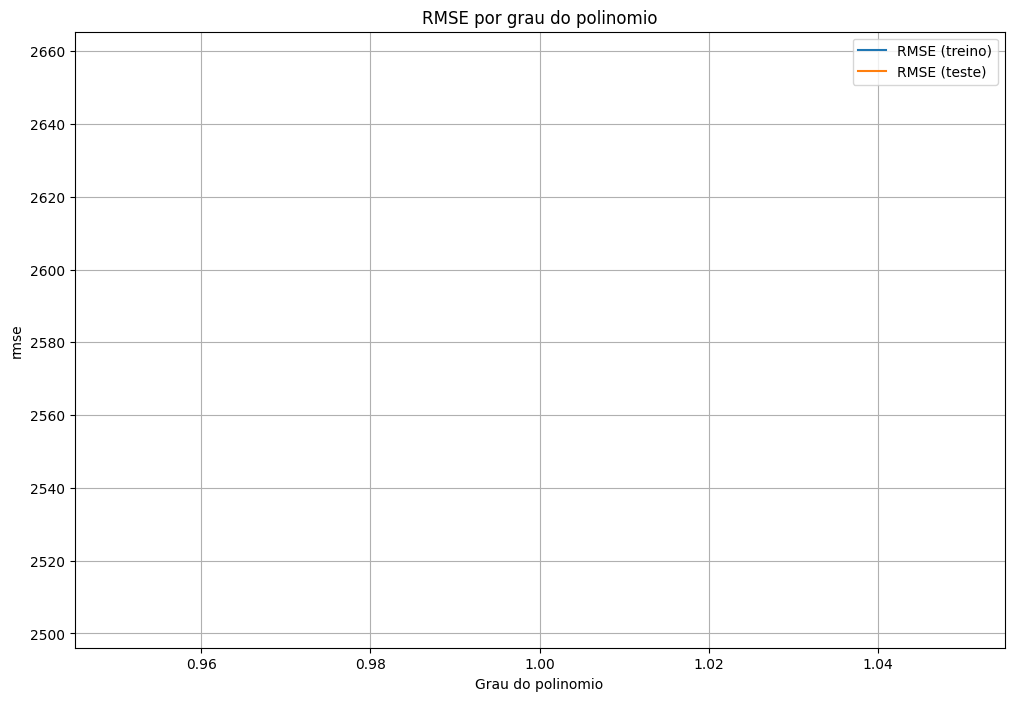

In [262]:
# Plotar grafico para comparar rmse por grau de polinomio
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, rmse_train_values, label= 'RMSE (treino)')
plt.plot(graus_polynomial, rmse_test_values, label= 'RMSE (teste)')
plt.xlabel('Grau do polinomio')
plt.ylabel('rmse')
plt.title('RMSE por grau do polinomio')
plt.legend()
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

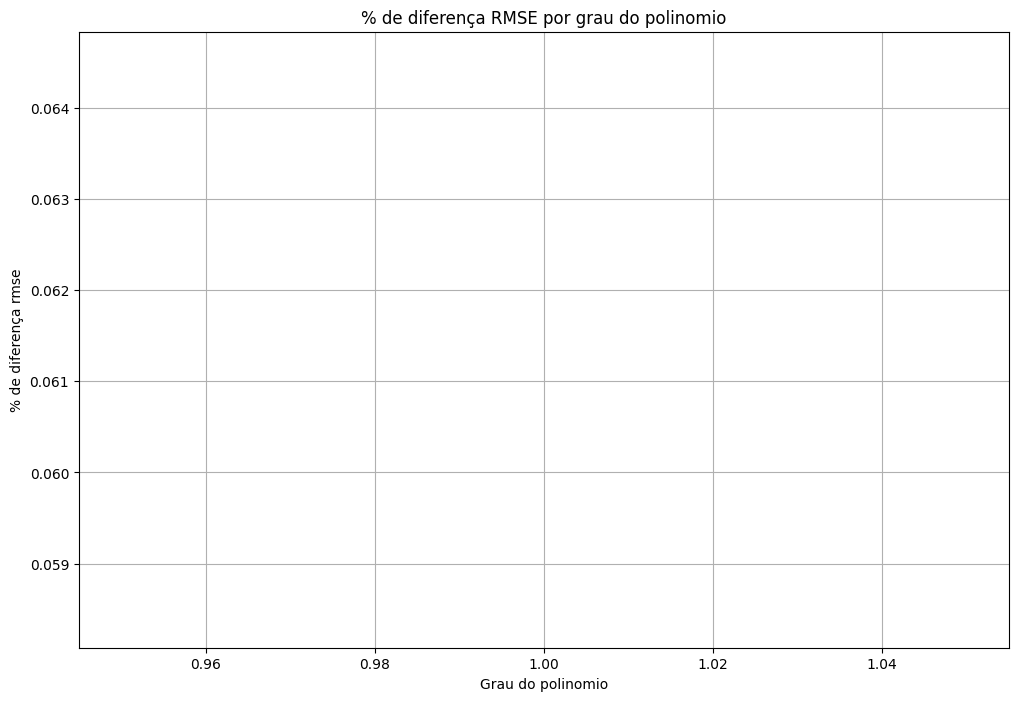

In [263]:
# Plotar grafico para comparar percentual de diferença rmse treino e teste
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, percentual_rmse_values, label= '% de diferença RMSE treino e teste')
plt.xlabel('Grau do polinomio')
plt.ylabel('% de diferença rmse')
plt.title('% de diferença RMSE por grau do polinomio')
plt.grid(True)
plt.show

### Análise de métricas - modelo polinomial

In [245]:
# Métricas
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final}')
print(f'R2Score Teste: {r2score_test_final}')

RMSE Treino: 2503.7778480738625
RMSE Teste: 2657.652017969138
% Dif. RMSE Treino e Teste: 0.06145679817945894
R2Score Teste: -0.14445717564615213


In [246]:
for i, grau in enumerate(graus_polynomial):
    print(f"Grau {grau} | RMSE Treino: {rmse_train_values[i]:.2f} | "
          f"RMSE Teste: {rmse_test_values[i]:.2f} | "
          f"% Diferença: {percentual_rmse_values[i]*100:.2f}% | "
          f"R² Teste: {r2score_test_values[i]:.2f}")


Grau 1 | RMSE Treino: 2503.78 | RMSE Teste: 2657.65 | % Diferença: 6.15% | R² Teste: -0.14


In [197]:
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

## Analise de residuos - modelo polinomial

In [247]:
# Transformar residuos na escala padrao
# (X-media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

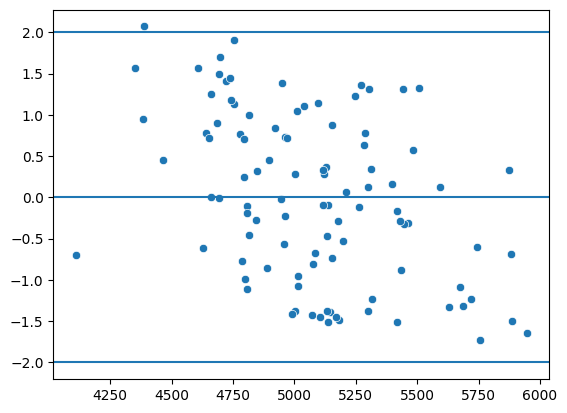

In [248]:
# Verificar linearidade dos residuos: valores -2 ~ +2 (escala padrão)
# Verificar homocedasticidade: valores em torno da reta sem nenhuma tendência ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

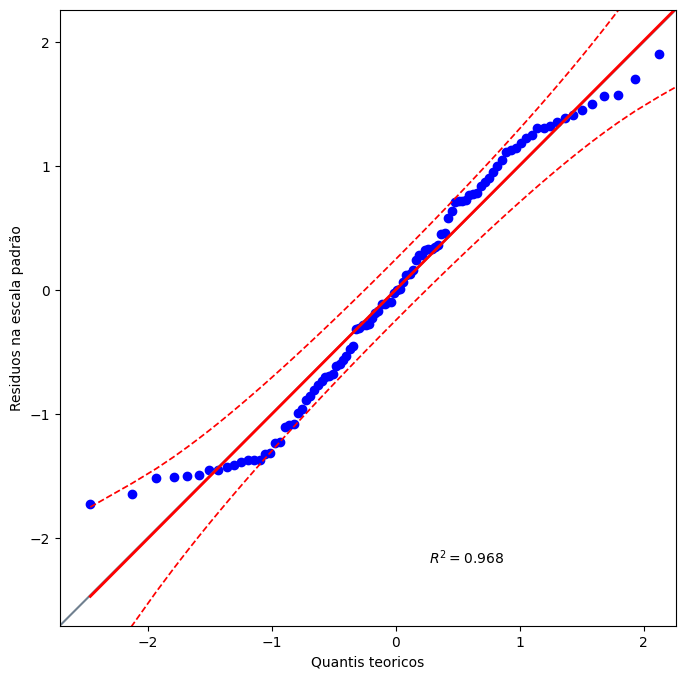

In [260]:
# Checar se residuos seguem uma distribuição normal
# QQ plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis teoricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

In [251]:
# Teste de normalidade - Shapiro Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estatistica de teste {stat_shapiro} e P-Value {p_value_shapiro}")

Estatistica de teste 0.9603400453291031 e P-Value 0.004252356300943491


In [252]:
# Teste de normalidade - Kolmogorov Smirnov
stats_ks, p_value_ks = kstest(residuos,'norm')
print(f"Estatistica de teste {stats_ks} e P-Value {p_value_ks}")

Estatistica de teste 0.5 e P-Value 1.213143437181786e-23


In [253]:
# Teste de normalidade - Lilliefors
stats_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f"Estatistica de teste {stats_ll} e P-Value {p_value_ll}")

Estatistica de teste 0.0787194047136276 e P-Value 0.1409104092052727


In [256]:
input_features = {
    'tempo_de_experiencia': 50,
    'numero_de_vendas': 30,
    'fator_sazonal': 10
}

pred_df = pd.DataFrame(input_features, index=[1])

In [267]:
# Predição
model_poly.predict(pred_df)

array([5149.07026608])

In [266]:
import joblib
joblib.dump(model_poly, './model_sales.pkl')

['./model_sales.pkl']

In [268]:
joblib.dump(encoder, 'encoder_fator_sazonal.pkl')

['encoder_fator_sazonal.pkl']